In [288]:
import pandas as pd
import numpy as np

In [289]:
pwd

'C:\\Users\\ricardo.lugo\\Documents\\Python Scripts\\Testing'

In [290]:
df = pd.read_csv("TRACKER S3_JAN2021 (2).csv")

C:\Users\ricardo.lugo\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (4,5,20,21,22,23,24) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [291]:
df.columns

Index(['Company Name', 'Customer ID', 'Global Device ID', 'Trip Name',
       'Carrier Name', 'Shipper', 'Description', 'Scheduled Begin',
       'Scheduled End', 'Actual Begin', 'Actual End',
       'Mean Kinetic Temperature', 'Origin', 'Origin Address', 'Origin City',
       'Origin State', 'Destination', 'Destination Address',
       'Destination City', 'Destination State',
       'Airport Departure Location Name', 'Airport Arrival Location Name',
       'Carrier', 'Order Number', 'Cargo', 'Trip Duration',
       'Out of Range Duration Trip', 'Low Critical Alert Count',
       'Low Warning Alert Count', 'High Warning Alert Count',
       'High Critical Alert Count', 'Shipment Creation Date',
       'Average Temperature', 'Minimum Temperature', 'Maximum Temperature',
       'Time Below Out of Range', 'Time Above Out of Range',
       'Low Critical Temperature', 'Low Warning Temperature',
       'High Warning Temperature', 'High CriticalTemperature',
       'Temperature Standard Devia

In [292]:
#df = df.loc[df['Actual End'] > '2021-01-01T00:15:21']

In [293]:
df_cal_giant = df[df['Company Name'] == "Wonderful Citrus"]
#df_cal_giant = df

# Shipments w/out alerts


In [294]:
df_cal_giant.loc[(df_cal_giant['High Critical Alert Count'] + df_cal_giant['Low Critical Alert Count']) >= 1,'Alert_Trip'] = 'Yes'
df_cal_giant.loc[(df_cal_giant['High Critical Alert Count'] + df_cal_giant['Low Critical Alert Count']) < 1,'Alert_Trip'] = 'No'

df_cal_giant.groupby('Alert_Trip').count()

C:\Users\ricardo.lugo\Anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\ricardo.lugo\Anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\ricardo.lugo\Anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

,Company Name,Customer ID,Global Device ID,Trip Name,Carrier Name,Shipper,Description,Scheduled Begin,Scheduled End,Actual Begin,...,Maximum Temperature,Time Below Out of Range,Time Above Out of Range,Low Critical Temperature,Low Warning Temperature,High Warning Temperature,High CriticalTemperature,Temperature Standard Deviation,_BATCH_ID_,_BATCH_LAST_RUN_
Alert_Trip,,,,,,,,,,,,,,,,,,,,,
No,31711,31711,31711,260,25742,0,31152,31711,31711,31711,...,18275,31704,31704,27611,27611,27611,27611,18275,31711,31711
Yes,5052,5052,5052,78,4146,0,4474,5052,5052,5052,...,2463,5052,5052,5050,5050,5050,5050,2463,5052,5052


In [295]:
yes_alert = df_cal_giant[df_cal_giant['Alert_Trip'] == 'Yes'].shape[0] 
no_alert = df_cal_giant[df_cal_giant['Alert_Trip'] == 'No'].shape[0]
total_rows = df_cal_giant.shape[0]

In [296]:
Trips_no_alerts = no_alert/total_rows
Trips_no_alerts

0.8625792236759786

# MKT high/low from temp range

In [297]:
df_cal_giant.loc[(df_cal_giant['Mean Kinetic Temperature'] > df_cal_giant['High CriticalTemperature'])
                 | (df_cal_giant['Mean Kinetic Temperature'] < df_cal_giant['Low Critical Temperature']), 'mkt_high']= 'Out'
                                        

C:\Users\ricardo.lugo\Anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\ricardo.lugo\Anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [298]:
df_cal_giant['mkt_high']= df_cal_giant['mkt_high'].fillna(0)

<ipython-input-298-14f7d56f7e8c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cal_giant['mkt_high']= df_cal_giant['mkt_high'].fillna(0)


In [299]:
df_cal_giant['mkt_high'].unique()

array([0, 'Out'], dtype=object)

In [300]:
out_temp = df_cal_giant[df_cal_giant['mkt_high'] == 'Out'].shape[0] 
in_temp = df_cal_giant[df_cal_giant['mkt_high'] == 0].shape[0]


In [301]:
out_temp

11224

In [302]:
in_temp

25539

In [303]:
ship_out_perc = out_temp/total_rows
ship_out_perc

0.30530696624323367

# Perfect Trip

In [304]:
df_cal_giant.loc[(df_cal_giant['mkt_high'] == 0) & (df_cal_giant['Alert_Trip'] == 'No'), 'perfect']= 'Yes'


In [305]:
df_cal_giant['perfect'] = df_cal_giant['perfect'].fillna(0)

<ipython-input-305-acbff5557ac2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cal_giant['perfect'] = df_cal_giant['perfect'].fillna(0)


In [306]:
perfect = df_cal_giant[df_cal_giant['perfect'] == 'Yes'].shape[0] 

In [307]:
perfect

22926

In [308]:
perfect_perc =  perfect/total_rows

In [309]:
perfect_perc

0.6236161357887006

# Outliers Shipments

In [310]:
import seaborn as sns

<AxesSubplot:xlabel='Trip Duration'>

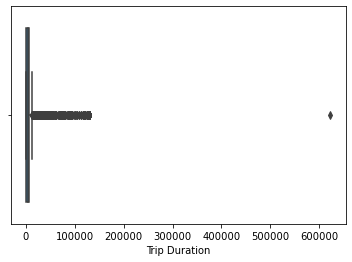

In [311]:
sns.boxplot(x=df_cal_giant['Trip Duration'])

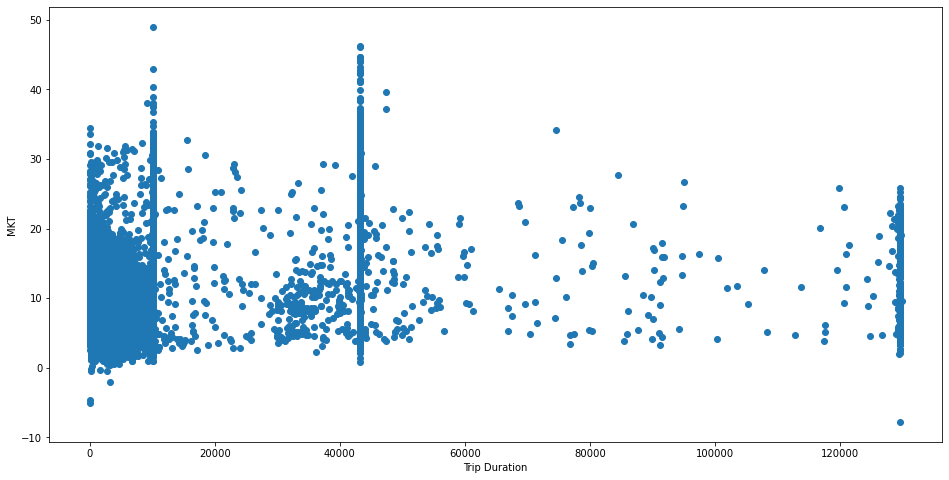

In [312]:
%matplotlib inline
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df_cal_giant['Trip Duration'], df_cal_giant['Mean Kinetic Temperature'])
ax.set_xlabel('Trip Duration')
ax.set_ylabel('MKT')
plt.show()

In [313]:
df_cal_giant.sort_values(by='Trip Duration', ascending=False, inplace=True)
Q1 = df_cal_giant['Trip Duration'].quantile(0.25)
Q3 = df_cal_giant['Trip Duration'].quantile(0.75)
IQR = Q3-Q1

<ipython-input-313-a2a6e480bed1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cal_giant.sort_values(by='Trip Duration', ascending=False, inplace=True)


In [314]:
Q1

835.0

In [315]:
Q3

5623.0

In [316]:
duration_outliers = df_cal_giant['Trip Duration'] > (Q3 + 1.5 * IQR)

In [317]:
df_cal_giant['Time_ourlier'] = duration_outliers

<ipython-input-317-a8c2cfb8fda2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cal_giant['Time_ourlier'] = duration_outliers


In [318]:
df_cal_giant['Time_ourlier'].unique()

array([ True, False])

In [319]:
time_outliers = df_cal_giant[df_cal_giant['Time_ourlier'] == True]

In [320]:
total_outliers = time_outliers.shape[0]

In [321]:
outliear_perc = total_outliers/total_rows

In [322]:
outliear_perc*100

8.881212088240895

In [323]:
total_outliers

3265

In [324]:
export = time_outliers.groupby('Destination').agg({'Global Device ID': 'count',
                                          'Trip Duration': 'mean',
                                          'Mean Kinetic Temperature': 'mean'})
                                          

In [325]:
export.sort_values(by='Global Device ID', ascending=False, inplace=True)

In [326]:
export.to_excel('destinations_outliers.xls')

# Outliers - Shipments out of Range

<AxesSubplot:xlabel='Trip Duration'>

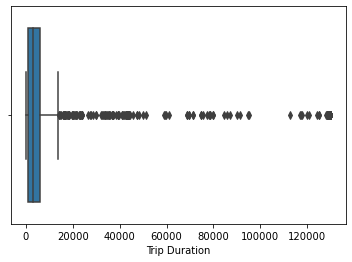

In [327]:
shipments_out_range_temp = df_cal_giant[df_cal_giant['mkt_high'] == 'Out']
sns.boxplot(x=shipments_out_range_temp['Trip Duration'])

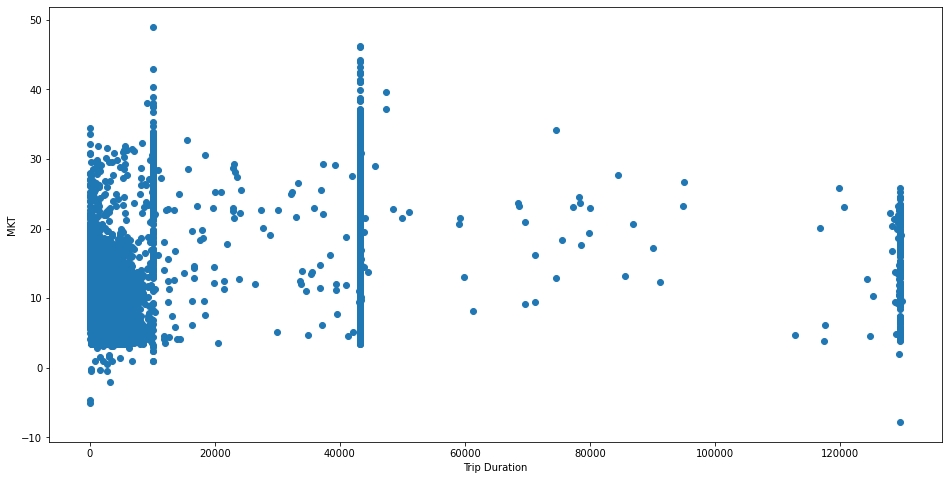

In [328]:
%matplotlib inline
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(shipments_out_range_temp['Trip Duration'], shipments_out_range_temp['Mean Kinetic Temperature'])
ax.set_xlabel('Trip Duration')
ax.set_ylabel('MKT')
plt.show()

In [329]:
shipments_out_range_temp.sort_values(by='Trip Duration', ascending=False)
Q1 = shipments_out_range_temp['Trip Duration'].quantile(0.25)
Q3 = shipments_out_range_temp['Trip Duration'].quantile(0.75)
IQR = Q3-Q1

In [330]:
duration_outliers = shipments_out_range_temp['Trip Duration'] > (Q3 + 1.5 * IQR)

In [331]:
shipments_out_range_temp['Time_outlier'] = duration_outliers
shipments_out_range_temp['Time_outlier'].unique()

<ipython-input-331-7f469e107cd2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shipments_out_range_temp['Time_outlier'] = duration_outliers


array([ True, False])

In [332]:
total_rows = shipments_out_range_temp.shape[0]
time_outliers = shipments_out_range_temp[shipments_out_range_temp['Time_outlier'] == True]
total_outliers = time_outliers.shape[0]
outliear_perc = total_outliers/total_rows
outliear_perc*100

16.51817533856023

In [333]:
total_outliers

1854

In [334]:
export = time_outliers.groupby('Destination').agg({'Global Device ID': 'count',
                                          'Trip Duration': 'mean',
                                          'Mean Kinetic Temperature': 'mean'})

In [335]:
export.sort_values(by='Global Device ID', ascending=False, inplace=True)

In [336]:
export.to_excel('destinations_outliers_out_temp.xls')

# Remove Outliers


In [337]:
df_no_outliers = df_cal_giant[df_cal_giant['Time_ourlier'] == False]

# ALL

In [338]:
companies = df['Company Name'].unique()

In [339]:
companies

array(['California Giant, Inc.', 'Driscolls China', 'Mission Produce',
       'Meijer', 'Chipotle Mexican Grill\t\t', 'Sun-Belle',
       'CHR - Generac', 'CHR - Global Forwarding',
       'CHR - Robinson Fresh - Save-A-Lot', 'TQL - Nathaniel Heyboer',
       'TQL - Jack Whittle - Pacific Produce LLC',
       'TQL - Jack Whittle - H & T Seafood', 'Wonderful Citrus',
       'Driscolls2', 'Classic Salads', 'Taylor Farms Mexico', 'Tesla',
       'The Kroger Company', 'CHR - Floral', 'CHR - Hussman',
       'CHR - Amazon Robotics', 'Sylvan America'], dtype=object)

In [340]:
def customer():
    
    companies = df['Company Name'].unique()
       
    #Columns to dataset
    df.dropna(subset = ["Global Device ID"], inplace=True)
    df.loc[(df['High Critical Alert Count'] + df['Low Critical Alert Count']) >= 1,'Alert_Trip'] = 'Yes'
    df.loc[(df['High Critical Alert Count'] + df['Low Critical Alert Count']) < 1,'Alert_Trip'] = 'No'
    df.loc[(df['Mean Kinetic Temperature'] > df['High CriticalTemperature'])
                     | (df['Mean Kinetic Temperature'] < df['Low Critical Temperature']), 'mkt_high']= 'Out'
    df['mkt_high']= df['mkt_high'].fillna(0)
    
    df.loc[(df['mkt_high'] == 0) & (df['Alert_Trip'] == 'No'), 'perfect']= 'Yes'
    df['perfect'] = df['perfect'].fillna(0)
    
   #lists
    company = []
    no_alerts = []
    out_of_range = []
    perfect = []
    outlier = []
    temp_outlier = [] 
    no_alerts_no_outliers = []
    out_of_range_no_outliers = []
    outlier_no_outliers = []

    for customer in companies:
        
        df1 = df[df['Company Name'] == customer]
        company.append(customer)     
        
           
        
        #Alert Trips
        yes_alert = df1[df1['Alert_Trip'] == 'Yes'].shape[0] 
        no_alert = df1[df1['Alert_Trip'] == 'No'].shape[0]
        total_rows = df1.shape[0]        
        Trips_no_alerts = no_alert/total_rows
        no_alerts.append(Trips_no_alerts)

        #Temperature evaluation
        out_temp = df1[df1['mkt_high'] == 'Out'].shape[0] 
        in_temp = df1[df1['mkt_high'] == 0].shape[0]
        ship_out_perc = out_temp/total_rows
        out_of_range.append(ship_out_perc)

        #Perfect Trip
        perfect = df1[df1['perfect'] == 'Yes'].shape[0] 
        perfect_perc =  perfect/total_rows
        #perfect.setdefault.append(perfect_perc)

        #Outliers - Time    
        df1.sort_values(by='Trip Duration', ascending=False, inplace=True)
        Q1 = df1['Trip Duration'].quantile(0.25)
        Q3 = df1['Trip Duration'].quantile(0.75)
        IQR = Q3-Q1
        duration_outliers = df1['Trip Duration'] > (Q3 + 1.5 * IQR)
        df1['Time_ourlier'] = duration_outliers
        time_outliers = df1[df1['Time_ourlier'] == True]
        total_outliers = time_outliers.shape[0]
        outliear_perc = total_outliers/total_rows
        outlier.append(outliear_perc)

        #Outliers - Shipments out of range only
        shipments_out_range_temp = df1[df1['mkt_high'] == 'Out']   
        shipments_out_range_temp.sort_values(by='Trip Duration', ascending=False)
        Q1 = shipments_out_range_temp['Trip Duration'].quantile(0.25)
        Q3 = shipments_out_range_temp['Trip Duration'].quantile(0.75)
        IQR = Q3-Q1
        duration_outliers = shipments_out_range_temp['Trip Duration'] > (Q3 + 1.5 * IQR)
        shipments_out_range_temp['Time_outlier'] = duration_outliers
        total_rows = shipments_out_range_temp.shape[0]
        time_outliers = shipments_out_range_temp[shipments_out_range_temp['Time_outlier'] == True]
        total_outliers = time_outliers.shape[0]
        
        if total_outliers & total_rows ==0:
            outliear_perc_temp = 'Not Applicable'
        else:
            outliear_perc_temp = total_outliers/total_rows
        
        temp_outlier.append(outliear_perc_temp)
    
        #Remove outliers
        
        df_no_outliers = df1[df1['Time_ourlier'] == False]
        
            #Alert Trips
        yes_alert = df_no_outliers[df_no_outliers['Alert_Trip'] == 'Yes'].shape[0] 
        no_alert = df_no_outliers[df_no_outliers['Alert_Trip'] == 'No'].shape[0]
        total_rows = df_no_outliers.shape[0]        
        Trips_no_alerts = no_alert/total_rows
        no_alerts_no_outliers.append(Trips_no_alerts)
        
            #Temperature evaluation
        out_temp = df_no_outliers[df_no_outliers['mkt_high'] == 'Out'].shape[0] 
        in_temp = df_no_outliers[df_no_outliers['mkt_high'] == 0].shape[0]
        ship_out_perc = out_temp/total_rows
        out_of_range_no_outliers.append(ship_out_perc)
        
             #Perfect Trip
        perfect = df_no_outliers[df_no_outliers['perfect'] == 'Yes'].shape[0] 
        perfect_perc =  perfect/total_rows
        #perfect.setdefault.append(perfect_perc)
        
            #Outliers - Time    
        df_no_outliers.sort_values(by='Trip Duration', ascending=False, inplace=True)
        Q1 = df_no_outliers['Trip Duration'].quantile(0.25)
        Q3 = df_no_outliers['Trip Duration'].quantile(0.75)
        IQR = Q3-Q1
        duration_outliers = df_no_outliers['Trip Duration'] > (Q3 + 1.5 * IQR)
        df_no_outliers['Time_ourlier'] = duration_outliers
        time_outliers = df_no_outliers[df_no_outliers['Time_ourlier'] == True]
        total_outliers = time_outliers.shape[0]
        outliear_perc = total_outliers/total_rows
        outlier_no_outliers.append(outliear_perc)
        
        
        
        
        
        
    
    table = pd.DataFrame({'Company': company,
                          'Trips with no alerts': no_alerts,
                          'Trips with no alerts - no outliers' : no_alerts_no_outliers,
                          'Trips out of temp range': out_of_range,
                          'Trips out of temp range - no outliers' : out_of_range_no_outliers,
                          
                          'Outliers Percentage': outlier,
                          'Outliers trips out of range': temp_outlier,
                          
                          
                          'Outliers Percentage - no outlier (1st iteration)': outlier_no_outliers, 
        
    })
    
    table.to_excel('table.xls')
    

    return table

In [341]:
customer()

<ipython-input-340-fd5adf31ff6e>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.sort_values(by='Trip Duration', ascending=False, inplace=True)
<ipython-input-340-fd5adf31ff6e>:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Time_ourlier'] = duration_outliers
<ipython-input-340-fd5adf31ff6e>:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#re

,Company,Trips with no alerts,Trips with no alerts - no outliers,Trips out of temp range,Trips out of temp range - no outliers,Outliers Percentage,Outliers trips out of range,Outliers Percentage - no outlier (1st iteration)
0,"California Giant, Inc.",0.999980,0.999977,0.294192,0.251407,0.109931,0.135385,0.002949
1,Driscolls China,0.234982,0.234982,0.324925,0.324925,0.000000,Not Applicable,0.000000
2,Mission Produce,0.610592,0.646620,0.082165,0.046869,0.061137,Not Applicable,0.004562
3,Meijer,0.864155,0.915584,0.105023,0.025974,0.121005,Not Applicable,0.018182
4,Chipotle Mexican Grill\t\t,0.500000,0.500000,0.500000,0.500000,0.000000,Not Applicable,0.000000
5,Sun-Belle,0.384819,0.418515,0.287288,0.233364,0.098551,0.227983,0.039611
6,CHR - Generac,1.000000,1.000000,0.000388,0.000441,0.120202,Not Applicable,0.032613
7,CHR - Global Forwarding,1.000000,1.000000,0.259183,0.259317,0.000517,Not Applicable,0.000000
8,CHR - Robinson Fresh - Save-A-Lot,0.161455,0.163705,0.258101,0.195489,0.168277,Not Applicable,0.015721
9,TQL - Nathaniel Heyboer,0.929398,0.931235,0.013889,0.013986,0.006944,Not Applicable,0.000000
